# Report Plots - DR Radio Channels Analysis (2024)
This notebook contains all the finalized plots for inclusion in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set the same colors as in the original notebook for consistency
colors = ['salmon', '#F899F3', '#73FABD', '#6ED1F8','#E0F26D', '#106ED3']
facecolor = '#F5F5F5'

# Standard gender color mapping for consistency across all plots
gender_color_map = {
    'male': '#3498db',      # Blue
    'female': '#e74c3c',    # Red
    'other': '#95a5a6'      # Gray
}

# Set style for better looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load 2024 data files
p3_2024 = pd.read_csv('../data/p3_2024.csv')
p4_2024 = pd.read_csv('../data/p4_2024.csv')
p6_2024 = pd.read_csv('../data/p6_2024.csv')

# Combine all data
all_data = pd.concat([p3_2024, p4_2024, p6_2024], ignore_index=True)

# Convert datetime columns
all_data['localTime'] = pd.to_datetime(all_data['localTime'])
all_data['episodeStartTime'] = pd.to_datetime(all_data['episodeStartTime'])

# Extract time features
all_data['hour'] = all_data['localTime'].dt.hour
all_data['day_of_week'] = all_data['localTime'].dt.day_name()
all_data['month'] = all_data['localTime'].dt.month
all_data['date'] = all_data['localTime'].dt.date

print(f"Total records: {len(all_data):,}")
print(f"\nP3: {len(p3_2024):,}")
print(f"P4: {len(p4_2024):,}")
print(f"P6: {len(p6_2024):,}")
print(f"\nDate range: {all_data['localTime'].min()} to {all_data['localTime'].max()}")

Total records: 378,118

P3: 135,510
P4: 118,016
P6: 124,592

Date range: 2024-01-01 00:00:17 to 2024-12-31 23:59:55


## Plot 1: Gender Distribution by Channel

Plot saved as: ../plots/gender_distribution_by_channel.svg


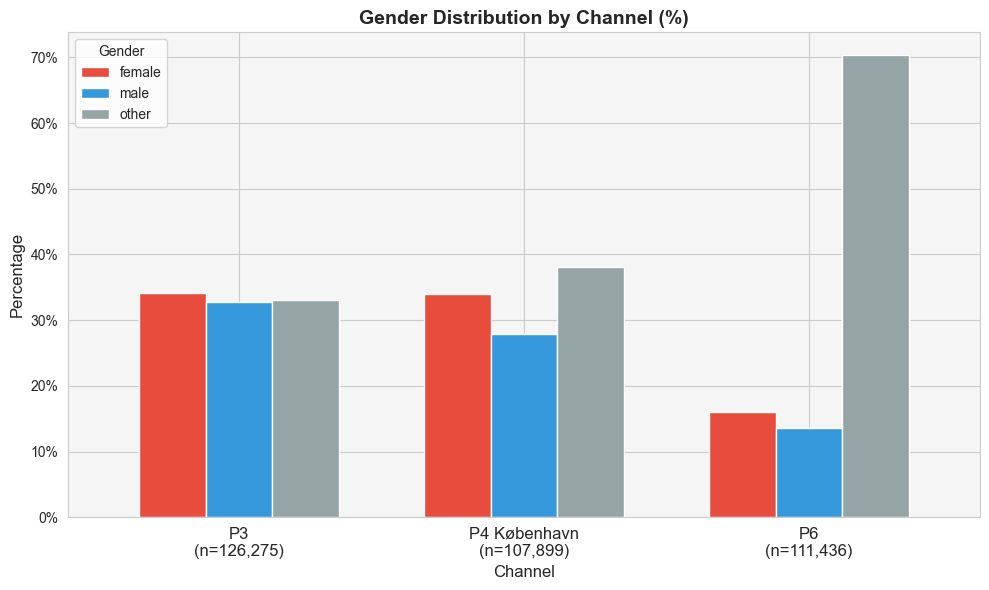


Gender distribution by channel (counts) - Male, Female, and Other:
gender        female   male  other
channel                           
P3             43102  41410  41763
P4 København   36681  30145  41073
P6             17944  15156  78336

Gender distribution by channel (percentages) - Male, Female, and Other:
gender        female   male  other
channel                           
P3             34.13  32.79  33.07
P4 København   34.00  27.94  38.07
P6             16.10  13.60  70.30

Total songs per channel:
channel
P3              126275
P4 København    107899
P6              111436
dtype: int64


In [3]:
# Overall gender distribution - Filter to male, female, and other
gender_data_filtered = all_data[all_data['gender'].isin(['male', 'female', 'other'])]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Distribution by channel (male, female, and other)
gender_by_channel = gender_data_filtered.groupby(['channel', 'gender']).size().unstack(fill_value=0)
gender_by_channel_pct = gender_by_channel.div(gender_by_channel.sum(axis=1), axis=0) * 100

# Calculate total songs per channel for labels
channel_totals = gender_by_channel.sum(axis=1)

# Map colors to the columns in the correct order
bar_colors = [gender_color_map.get(gender.lower(), '#95a5a6') for gender in gender_by_channel_pct.columns]
gender_by_channel_pct.plot(kind='bar', ax=ax, color=bar_colors, width=0.7)
ax.set_title('Gender Distribution by Channel (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Gender')

# Update x-axis labels to include (n=xx) with larger font size
new_labels = [f"{channel}\n(n={channel_totals[channel]:,})" for channel in channel_totals.index]
ax.set_xticklabels(new_labels, rotation=0, fontsize=12)

# Add percentage signs to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

# Set facecolor
ax.set_facecolor(facecolor)

plt.tight_layout()

# Save as SVG
plt.savefig('../plots/gender_distribution_by_channel.svg', format='svg', bbox_inches='tight')
print("Plot saved as: ../plots/gender_distribution_by_channel.svg")

plt.show()

print("\nGender distribution by channel (counts) - Male, Female, and Other:")
print(gender_by_channel)
print("\nGender distribution by channel (percentages) - Male, Female, and Other:")
print(gender_by_channel_pct.round(2))
print("\nTotal songs per channel:")
print(channel_totals)

# Plot 2: Gender Distribution Weekly

Plot saved as: ../plots/p3_gender_distribution_weekly.svg


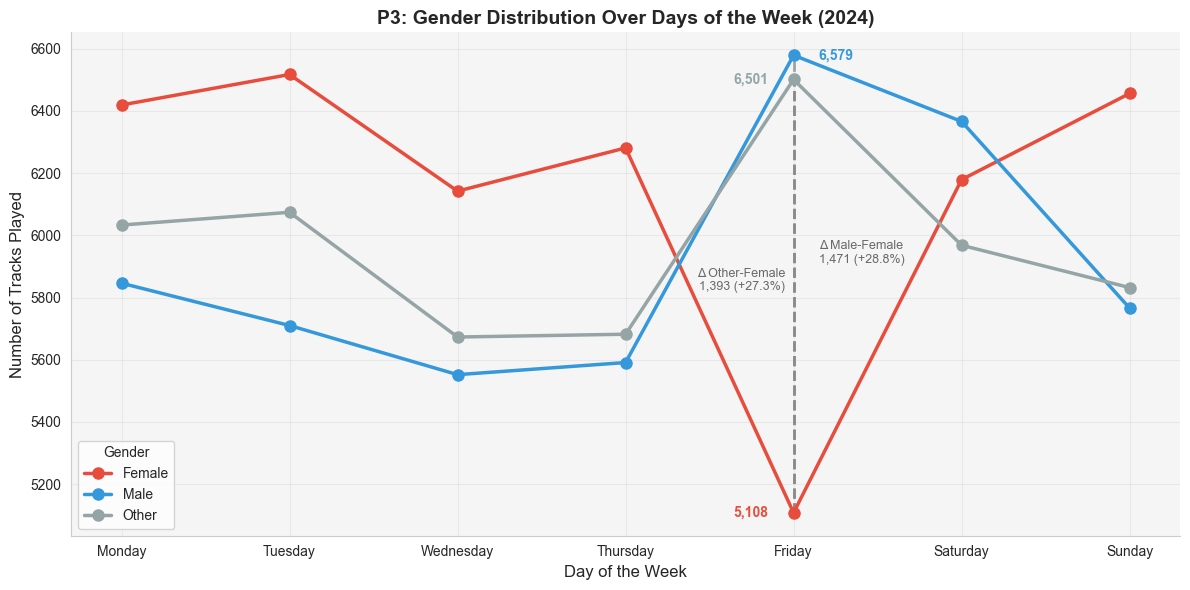


P3 Gender distribution by day of week (counts):
gender           female  male  other
day_of_week_num                     
0                  6419  5846   6033
1                  6517  5710   6074
2                  6142  5552   5673
3                  6281  5591   5682
4                  5108  6579   6501
5                  6179  6366   5968
6                  6456  5766   5832

Friday values:
Female: 5,108
Male: 6,579
Other: 6,501

Friday differences:
Male - Female: 1,471 (+28.8%)
Other - Female: 1,393 (+27.3%)


In [4]:
# Filter P3 data and only keep male, female, and other
p3_data = p3_2024[p3_2024['gender'].isin(['male', 'female', 'other'])].copy()
p3_data['localTime'] = pd.to_datetime(p3_data['localTime'])
p3_data['day_of_week_num'] = p3_data['localTime'].dt.dayofweek

# Group by day of week and gender
p3_grouped_dayofweek = p3_data.groupby(['day_of_week_num', 'gender']).size().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor(facecolor)

# Plot lines for each gender
for gender in ['female', 'male', 'other']:
    ax.plot(p3_grouped_dayofweek.index, p3_grouped_dayofweek[gender], 
            color=gender_color_map[gender], linewidth=2.5, marker='o', markersize=8, label=gender.capitalize())

# Add diagonal lines on Friday (day 4) to show the difference between male/other and female
friday_idx = 4
friday_female = p3_grouped_dayofweek.loc[friday_idx, 'female']
friday_male = p3_grouped_dayofweek.loc[friday_idx, 'male']
friday_other = p3_grouped_dayofweek.loc[friday_idx, 'other']

# Draw line from female to male
ax.plot([friday_idx, friday_idx], [friday_female, friday_male], 
        color='gray', linestyle='--', linewidth=2, alpha=0.7, zorder=1)

# Draw line from female to other
ax.plot([friday_idx, friday_idx], [friday_female, friday_other], 
        color='gray', linestyle='--', linewidth=2, alpha=0.7, zorder=1)

# Add annotations for the differences
male_diff = friday_male - friday_female
other_diff = friday_other - friday_female

# Calculate percentage differences
male_pct_diff = (male_diff / friday_female) * 100
other_pct_diff = (other_diff / friday_female) * 100

# Annotate the male-female difference (positioned to the right, slightly higher)
mid_male = (friday_male + friday_female) / 2 + 100
ax.text(friday_idx + 0.15, mid_male, f'Δ Male-Female\n{male_diff:,.0f} (+{male_pct_diff:.1f}%)', 
        fontsize=9, va='center', ha='left', color='dimgray')

# Annotate the other-female difference (positioned more to the right and up)
mid_other = (friday_other + friday_female) / 2 + 50
ax.text(friday_idx - 0.05, mid_other, f'Δ Other-Female\n{other_diff:,.0f} (+{other_pct_diff:.1f}%)', 
        fontsize=9, va='center', ha='right', color='dimgray')

# Add y-values for all three categories on Friday (positioned inside plot bounds)
ax.text(friday_idx - 0.15, friday_female, f'{friday_female:,.0f}', 
        fontsize=10, va='center', ha='right', fontweight='bold',
        color=gender_color_map['female'])

ax.text(friday_idx + 0.15, friday_male, f'{friday_male:,.0f}', 
        fontsize=10, va='center', ha='left', fontweight='bold',
        color=gender_color_map['male'])

ax.text(friday_idx - 0.15, friday_other, f'{friday_other:,.0f}', 
        fontsize=10, va='center', ha='right', fontweight='bold',
        color=gender_color_map['other'])

# Customize the plot
ax.set_xticks(np.arange(0, 7, 1))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('P3: Gender Distribution Over Days of the Week (2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Number of Tracks Played', fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(title='Gender')
ax.grid(True, alpha=0.3)

plt.tight_layout()

# Save as SVG
plt.savefig('../plots/p3_gender_distribution_weekly.svg', format='svg', bbox_inches='tight')
print("Plot saved as: ../plots/p3_gender_distribution_weekly.svg")

plt.show()

print("\nP3 Gender distribution by day of week (counts):")
print(p3_grouped_dayofweek)
print(f"\nFriday values:")
print(f"Female: {friday_female:,.0f}")
print(f"Male: {friday_male:,.0f}")
print(f"Other: {friday_other:,.0f}")
print(f"\nFriday differences:")
print(f"Male - Female: {male_diff:,.0f} (+{male_pct_diff:.1f}%)")
print(f"Other - Female: {other_diff:,.0f} (+{other_pct_diff:.1f}%)")

# Plot 3: Full Year 24-hour Distribution 

Plot saved as: ../plots/p3_hourly_gender_distribution.svg


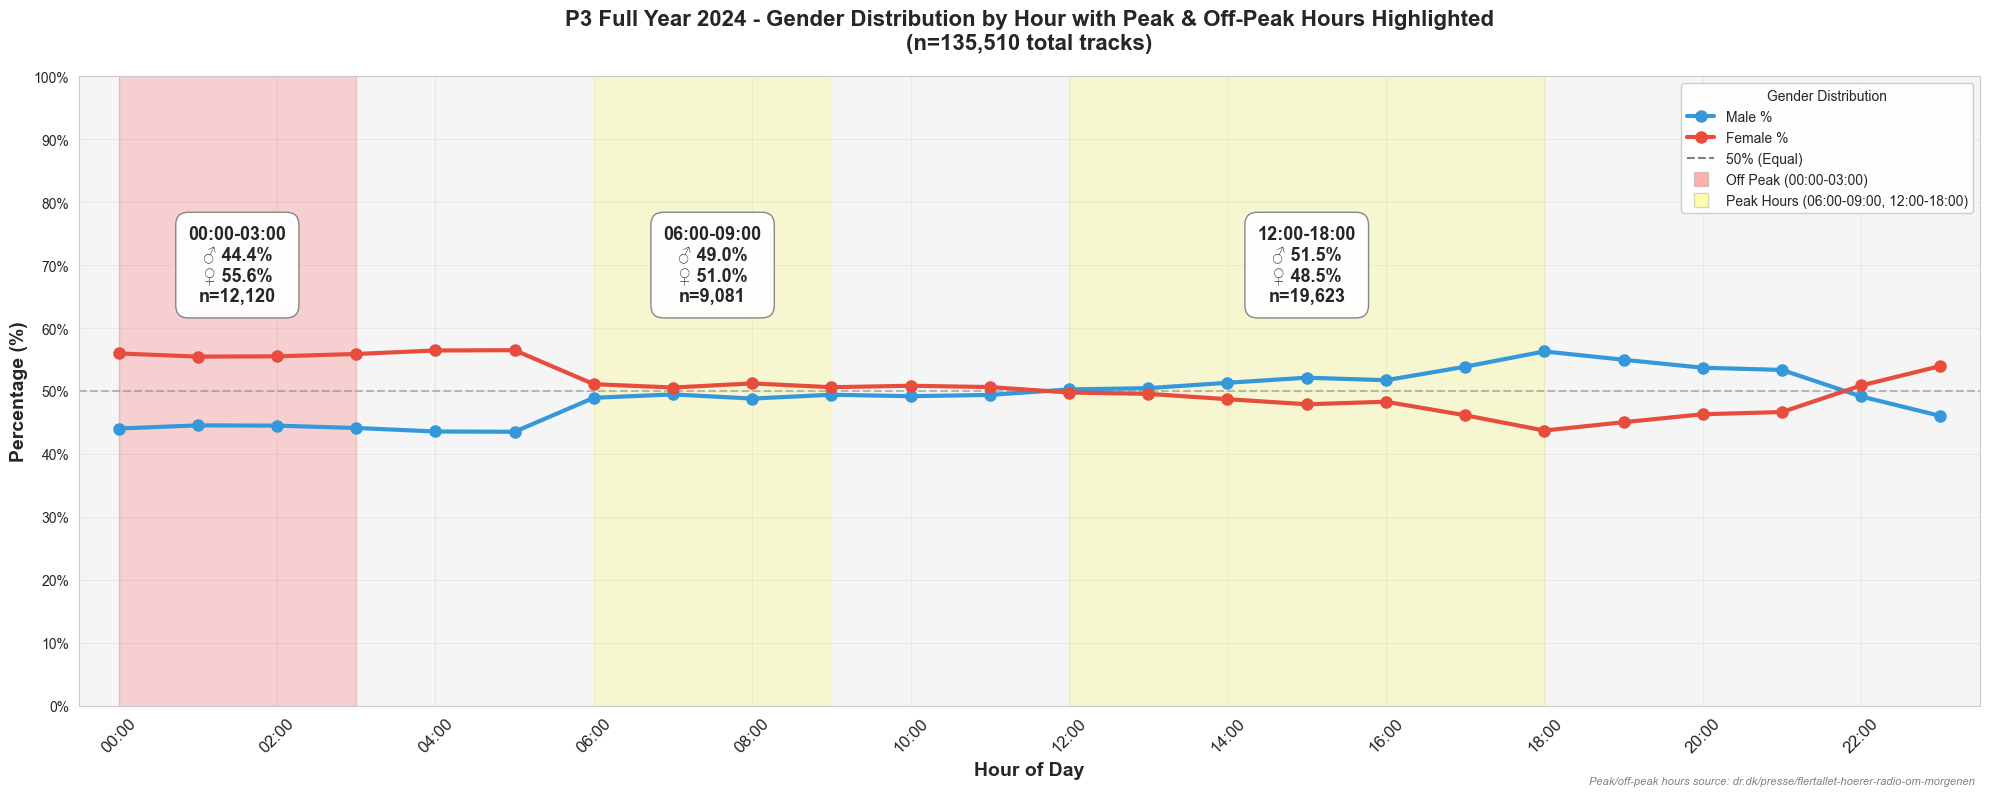


P3 Period Gender Distribution - Full Year 2024:
Total P3 tracks analyzed: 135,510
  00:00-03:00: Male 44.4%, Female 55.6% (n=12,120)
  06:00-09:00: Male 49.0%, Female 51.0% (n=9,081)
  12:00-18:00: Male 51.5%, Female 48.5% (n=19,623)


In [5]:
# Create line plot visualization for entire P3 2024 dataset
fig, ax = plt.subplots(figsize=(20, 8))

# Prepare P3 2024 data
p3_full = p3_2024.copy()
p3_full['localTime'] = pd.to_datetime(p3_full['localTime'])
p3_full['hour'] = p3_full['localTime'].dt.hour

# Count tracks by hour and gender (only male and female)
hourly_gender_counts = p3_full[p3_full['gender'].isin(['male', 'female'])].groupby(['hour', 'gender']).size().unstack(fill_value=0)

# Calculate percentages
hourly_gender_pct = hourly_gender_counts.div(hourly_gender_counts.sum(axis=1), axis=0) * 100

# Set background color
ax.set_facecolor(facecolor)
fig.patch.set_facecolor('white')

# Highlight off-peak hours (0:00-3:00) in red
ax.axvspan(0, 3, alpha=0.15, color='red', zorder=1)

# Highlight peak hours in yellow
peak_hours = [(6, 9), (12, 18)]
for start, end in peak_hours:
    ax.axvspan(start, end, alpha=0.15, color='yellow', zorder=1)

# Plot lines for each gender showing percentage
hours = hourly_gender_pct.index
ax.plot(hours, hourly_gender_pct['male'], marker='o', linewidth=3, 
        color=gender_color_map['male'], label='Male %', markersize=8, zorder=3)
ax.plot(hours, hourly_gender_pct['female'], marker='o', linewidth=3, 
        color=gender_color_map['female'], label='Female %', markersize=8, zorder=3)

# Add a 50% reference line
ax.axhline(y=50, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='50% (Equal)', zorder=2)

# Calculate and display gender percentages for off-peak and peak hours
all_periods = [(0, 3), (6, 9), (12, 18)]
peak_stats_text = []

for start, end in all_periods:
    peak_data = p3_full[(p3_full['hour'] >= start) & (p3_full['hour'] < end)]
    peak_data_filtered = peak_data[peak_data['gender'].isin(['male', 'female'])]
    total = len(peak_data_filtered)
    
    if total > 0:
        male_count = len(peak_data_filtered[peak_data_filtered['gender'] == 'male'])
        female_count = len(peak_data_filtered[peak_data_filtered['gender'] == 'female'])
        
        male_pct = (male_count / total) * 100
        female_pct = (female_count / total) * 100
        
        # Position text at the center of period
        mid_time = (start + end) / 2
        text_y = 70  # Position in upper part of chart
        
        stats_text = f"{start:02d}:00-{end:02d}:00\n♂ {male_pct:.1f}%\n♀ {female_pct:.1f}%\nn={total:,}"
        ax.text(mid_time, text_y, stats_text, 
               ha='center', va='center', fontsize=13, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.7', facecolor='white', edgecolor='gray', alpha=0.95),
               zorder=4)
        
        peak_stats_text.append(f"  {start:02d}:00-{end:02d}:00: Male {male_pct:.1f}%, Female {female_pct:.1f}% (n={total:,})")

# Add source note for peak/off-peak hours
fig.text(0.99, 0.01, 'Peak/off-peak hours source: dr.dk/presse/flertallet-hoerer-radio-om-morgenen', 
         ha='right', va='bottom', fontsize=8, style='italic', color='gray')

# Customize the plot
ax.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title(f'P3 Full Year 2024 - Gender Distribution by Hour with Peak & Off-Peak Hours Highlighted\n(n={len(p3_full):,} total tracks)', 
             fontsize=16, fontweight='bold', pad=20)

# Set x-axis to show 24 hours with larger font
ax.set_xlim(-0.5, 23.5)
ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)], rotation=45, fontsize=12)

# Set y-axis from 0 to 100% with % signs
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

# Create legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color=gender_color_map['male'], linewidth=3,
           markersize=8, label='Male %'),
    Line2D([0], [0], marker='o', color=gender_color_map['female'], linewidth=3,
           markersize=8, label='Female %'),
    Line2D([0], [0], color='gray', linestyle='--', linewidth=1.5, label='50% (Equal)'),
    Line2D([0], [0], marker='s', color='w', 
           markerfacecolor='red', markersize=10, alpha=0.3,
           label='Off Peak (00:00-03:00)', markeredgecolor='gray'),
    Line2D([0], [0], marker='s', color='w', 
           markerfacecolor='yellow', markersize=10, alpha=0.3,
           label='Peak Hours (06:00-09:00, 12:00-18:00)', markeredgecolor='gray')
]
ax.legend(handles=legend_elements, title='Gender Distribution', 
         loc='upper right', fontsize=10, framealpha=0.95)

ax.grid(True, alpha=0.3, zorder=0)
plt.tight_layout()

# Save as SVG
plt.savefig('../plots/p3_hourly_gender_distribution.svg', format='svg', bbox_inches='tight')
print("Plot saved as: ../plots/p3_hourly_gender_distribution.svg")

plt.show()

# Print all period statistics
print(f"\nP3 Period Gender Distribution - Full Year 2024:")
print(f"Total P3 tracks analyzed: {len(p3_full):,}")
for stat in peak_stats_text:
    print(stat)

## Plot 5: Gender Distribution by Radio Show on Fridays

Plot saved as: ../plots/p3_friday_shows_gender_distribution.svg


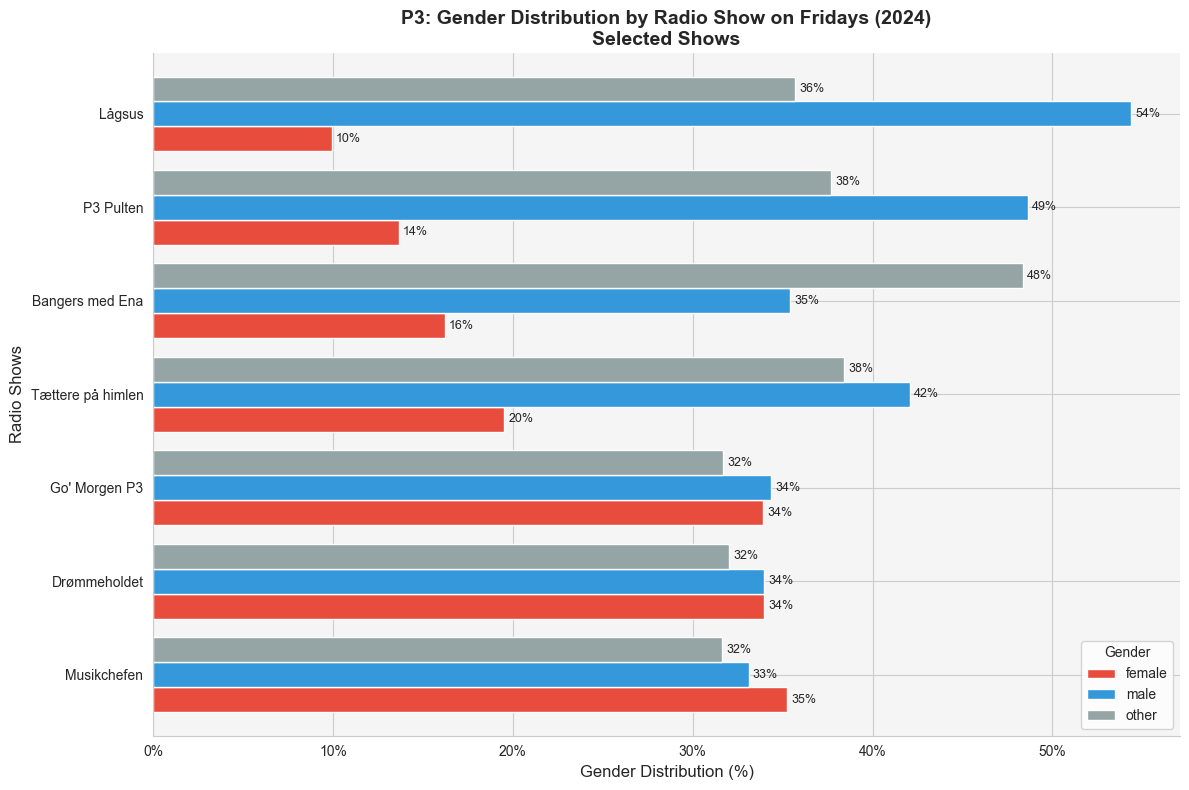


Total Friday shows analyzed: 30

Selected shows and their female artist representation:
  Musikchefen: 35.3% female, 33.1% male, 31.6% other
  Drømmeholdet: 34.0% female, 34.0% male, 32.0% other
  Go' Morgen P3: 33.9% female, 34.4% male, 31.7% other
  Tættere på himlen: 19.5% female, 42.1% male, 38.4% other
  Bangers med Ena: 16.2% female, 35.4% male, 48.4% other
  P3 Pulten: 13.7% female, 48.6% male, 37.7% other
  Lågsus: 9.9% female, 54.4% male, 35.7% other


In [6]:
# Filter P3 data for Fridays and clean episode titles
p3_fridays_shows = p3_2024.copy()
p3_fridays_shows['localTime'] = pd.to_datetime(p3_fridays_shows['localTime'])
p3_fridays_shows['weekday'] = p3_fridays_shows['localTime'].dt.weekday
p3_fridays_shows = p3_fridays_shows[p3_fridays_shows['weekday'] == 4]

# Clean episode titles using regex
regex_replacements = {
    r"^Bangers med Ena.*": "Bangers med Ena",
    r"^Sommerbangers.*": "Bangers med Ena",
    r"P3 med Ena Cosovic.*": "Bangers med Ena",
    r"^Drømmeholdet.*": "Drømmeholdet",
    r"^Carte Blanche.*": "Carte Blanche",
    r"^Lågsus.*": "Lågsus",
    r"^Musikchefen.*": "Musikchefen",
    r"^P3 Pulten.*": "P3 Pulten",
    r"^Tættere på himlen.*": "Tættere på himlen",
    r"P3 Guld.*": "P3 Guld",
    r"P3 Morgen.*": "P3 Morgen",
    r"Residensen.*": "Residensen",
    r"SommerMorgen.*": "SommerMorgen",
}

for pattern, replacement in regex_replacements.items():
    p3_fridays_shows['episodeTitle'] = p3_fridays_shows['episodeTitle'].str.replace(
        pattern, replacement, regex=True
    )

# Group by episode title and gender
grouped_gender = (
    p3_fridays_shows
    .groupby(['episodeTitle', 'gender'])
    .size()
    .unstack()
    .reindex(columns=['female', 'male', 'other'])
)

# Normalize by percentage
grouped_norm = grouped_gender.div(grouped_gender.sum(axis=1), axis=0)

# Sort by female percentage descending
grouped_norm = grouped_norm.sort_values(by=['female', 'male', 'other'], ascending=False)

# Select top 4 (lowest female representation - at the bottom of sorted list)
top_4 = grouped_norm.tail(4)

# Select specific shows
specific_shows = ['Go\' Morgen P3', 'Drømmeholdet', 'Musikchefen']
specific_data = grouped_norm.loc[grouped_norm.index.isin(specific_shows)]

# Combine selected shows
selected_shows = pd.concat([top_4, specific_data])
# Remove duplicates in case any of the specific shows are already in top 4
selected_shows = selected_shows[~selected_shows.index.duplicated(keep='first')]

# Sort by female percentage descending (lower female = higher on chart)
selected_shows = selected_shows.sort_values(by='female', ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor(facecolor)

# Plot horizontal bar chart with standard gender colors
selected_shows.plot(
    kind='barh',
    ax=ax,
    width=0.8,
    color=[gender_color_map['female'], gender_color_map['male'], gender_color_map['other']]
)

# Add percentage labels at the end of each bar
for container in ax.containers:
    # Create custom labels by multiplying values by 100
    labels = [f'{v.get_width()*100:.0f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

# Format x-axis as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
ax.set_xlabel("Gender Distribution (%)", fontsize=12)
ax.set_ylabel("Radio Shows", fontsize=12)
ax.set_title("P3: Gender Distribution by Radio Show on Fridays (2024)\nSelected Shows", fontsize=14, fontweight='bold')
ax.spines[['top', 'right']].set_visible(False)

# Legend
ax.legend(title="Gender", loc='lower right', fontsize=10)

plt.tight_layout()

# Save as SVG
plt.savefig('../plots/p3_friday_shows_gender_distribution.svg', format='svg', bbox_inches='tight')
print("Plot saved as: ../plots/p3_friday_shows_gender_distribution.svg")

plt.show()

print(f"\nTotal Friday shows analyzed: {len(grouped_norm)}")
print(f"\nSelected shows and their female artist representation:")
for show, row in selected_shows.iterrows():
    print(f"  {show}: {row['female']*100:.1f}% female, {row['male']*100:.1f}% male, {row['other']*100:.1f}% other")